In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing


In [2]:
data = fetch_california_housing(as_frame= True)
data_set = data.frame
print(data_set)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
frequency = data_set["Latitude"].value_counts()
print(frequency)


Latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
35.69      1
35.86      1
35.85      1
35.89      1
35.88      1
Name: count, Length: 862, dtype: int64


In [5]:
data_set.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


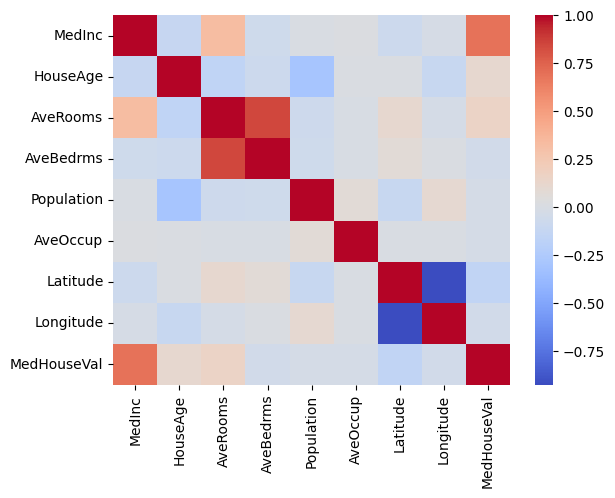

In [6]:
import seaborn as sns
numeric_data = data_set.select_dtypes(include=["number"])
sns.heatmap(numeric_data.corr() , cmap = 'coolwarm')
plt.show()

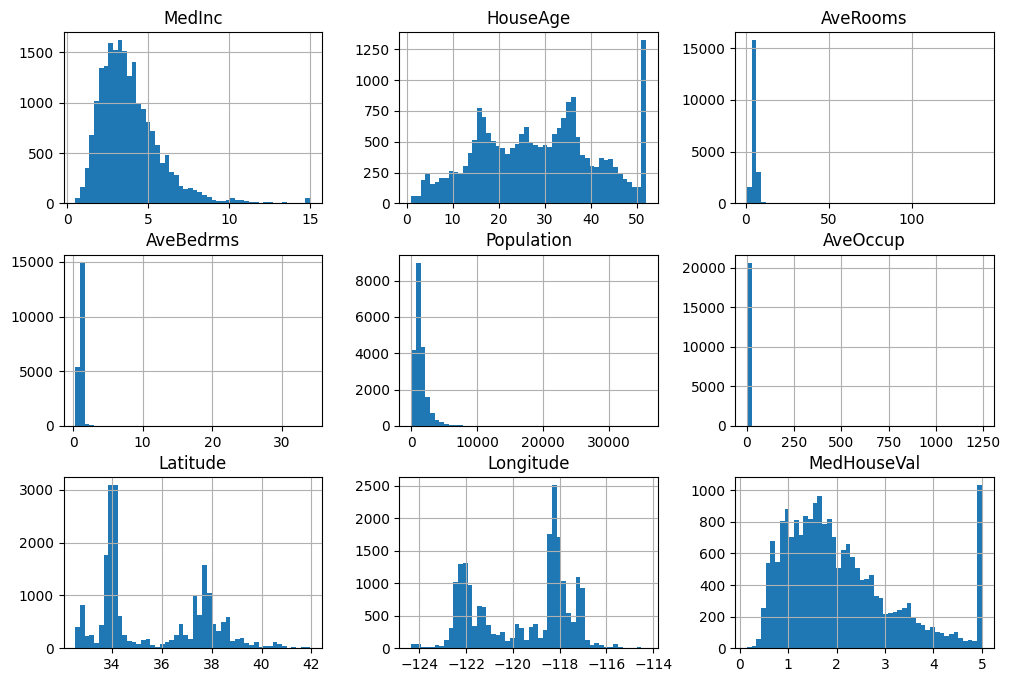

In [7]:
data_set.hist(bins = 50 , figsize = (12 , 8))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(data_set , test_size = 0.2 , random_state=42) 

In [9]:
data_set["Income_cat"] = pd.cut(data_set["MedInc"],
                                bins = [0. , 1.5 , 3.0 , 4.5 , 6., np.inf],
                                labels = [1 , 2  , 3 , 4 ,5])
#this divided the income data into a data which has a lesser bias

Income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64


<Axes: xlabel='Income_cat', ylabel='No of districts'>

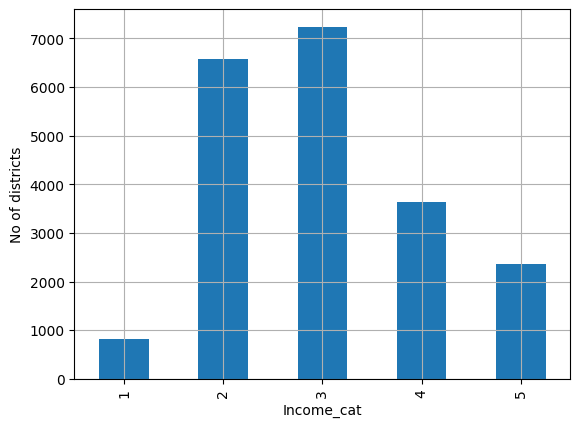

In [10]:
frequency = data_set["Income_cat"].value_counts().sort_index()
print(frequency)
plt.ylabel("No of districts")
frequency.plot(kind = "bar" , grid = True )


In [11]:
strat_train_set , start_test_set = train_test_split(data_set , test_size=0.2 , stratify=data_set["Income_cat"] , random_state=42)

In [12]:
strat_train_set["Income_cat"].value_counts() / len(strat_train_set)

Income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

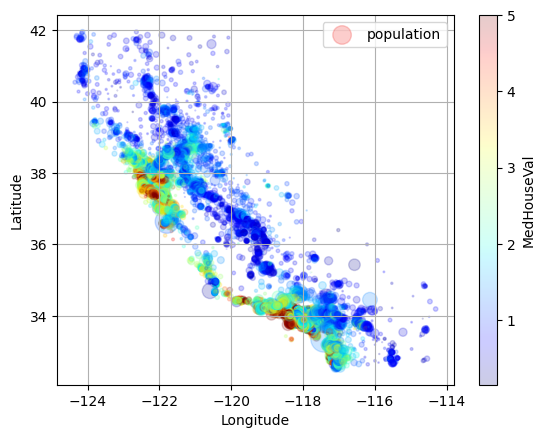

In [ ]:
data_set.plot(kind = "scatter" , x = "Longitude" , y = "Latitude" , alpha = 0.2 , grid = True,
              s = data_set["Population"] / 100 , label = "population",
              c = "MedHouseVal" , cmap = "jet" , colorbar = True)
plt.show()
#this gives us an idea about the density of the houses in a set loacation
# red is more expensive and larger area denote a large population

In [21]:
correaltion = data_set.corr()
correaltion["MedHouseVal"].sort_values(ascending = False)

MedHouseVal    1.000000
MedInc         0.688075
Income_cat     0.643892
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

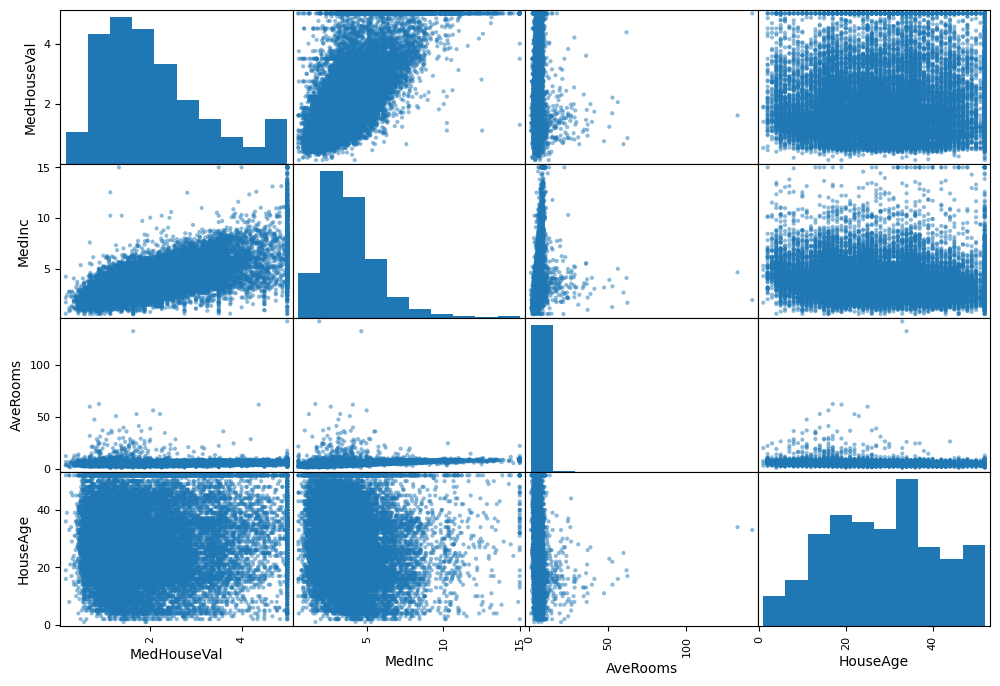

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["MedHouseVal","MedInc", "AveRooms" , "HouseAge"]
scatter_matrix(data_set[attributes] , figsize= (12 , 8))
plt.show()

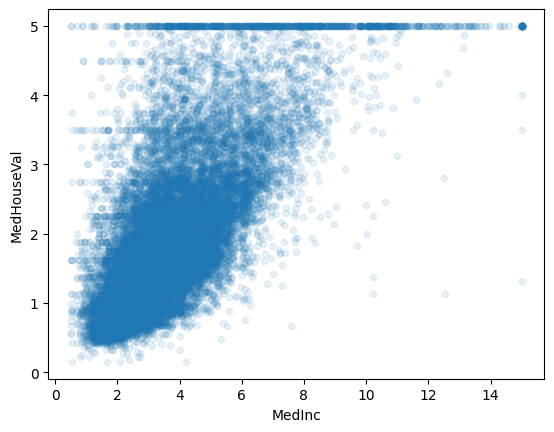

In [28]:
data_set.plot(kind = 'scatter' , x = "MedInc" , y = "MedHouseVal" , alpha = 0.1)
plt.show()